In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')

set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


In [3]:
df = pd.read_csv('scope_0.csv',skiprows=1)

In [4]:
df
t = df.iloc[:,0] * 1e6 # convert to microseconds
trans = df.iloc[:,1]
errsig = df.iloc[:,2]

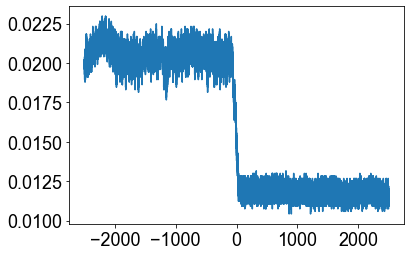

In [8]:
plt.plot(t,trans)

In [5]:
t

0       -2500.00
1       -2499.92
2       -2499.84
3       -2499.76
4       -2499.68
          ...   
62495    2499.60
62496    2499.68
62497    2499.76
62498    2499.84
62499    2499.92
Name: second, Length: 62500, dtype: float64

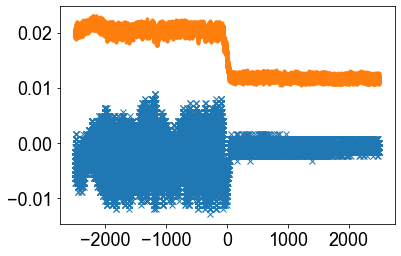

In [18]:
plt.plot(t,errsig,'x')
plt.plot(t,trans,'.')

In [69]:
import numpy as np

t_values = np.array(t)
index_of_zero = np.where(t_values == 0)[0][0] - 450

print(index_of_zero)

30800


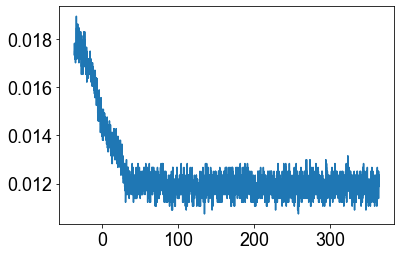

In [70]:
endpoint = 5000

t_data = t[index_of_zero:index_of_zero+endpoint]
trans_data = trans[index_of_zero:index_of_zero+endpoint] 
errsig_data = errsig[index_of_zero:index_of_zero+endpoint]

plt.plot(t_data,trans_data)
# plt.plot(t_data,errsig_data)

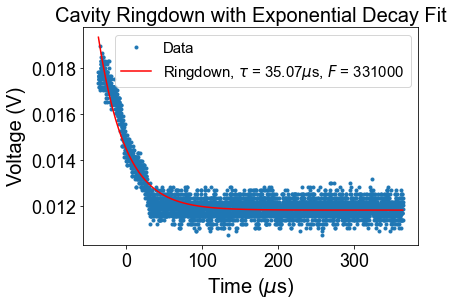


Fitted Parameters:
Fitted A   : 0.0026877545183578654
Fitted tau: 35.07400954304006
Fitted B: 0.011819350941401019


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decaying envelope function with a beat frequency
def envelope_func(t, A, tau, B):
    return A * np.exp(- t / tau) + B

# Fit the data to the envelope function
initial_guess = [0.1, 50, 0.05]  # Initial guess for [A, tau, f_beat]
popt, pcov = curve_fit(envelope_func, t_data, trans_data, p0=initial_guess)

# Extract the fitted parameters
fit_A, fit_tau, fit_B = popt
FSR = 1.5e9 # Free spectral range of the cavity in Hz
finesse =  np.round(2* np.pi * FSR * fit_tau * 1e-6, -3)

# Generate the fitted curve
y_fit = envelope_func(t_data, fit_A, fit_tau, fit_B)

# Plotting
plt.plot(t_data, trans_data, '.', label='Data')
plt.plot(t_data, y_fit, label=r'Ringdown, $\tau$ = %.2f$\mu$s, $F$ = %.0f'%(fit_tau,finesse), linestyle='-', color='red')
plt.xlabel(r'Time ($\mu$s)')
plt.ylabel('Voltage (V)')
plt.title('Cavity Ringdown with Exponential Decay Fit')
plt.legend()
plt.show()

print("\nFitted Parameters:")
print("Fitted A   :", fit_A)
print("Fitted tau:", fit_tau)
print("Fitted B:", fit_B)
